# CASE - Bike count data

What you will learn:
    
- get data from an url
- parsing date and time strings
- make a function to automate loading and processing data 
- resample

<img src="https://mobiliteit.stad.gent/sites/default/files/styles/thumb_epsa_330x220/public/media/fietstelpaal.jpg?itok=xNn8ylHV">

In this case study, we will make use of the freely available bike count data of the city of Ghent. At the Coupure Links, next to the Faculty of Bioscience Engineering, a counter keeps track of the number of passing cyclists in both directions.  
Those data are available on the open data portal of the city: https://data.stad.gent/datasets/fietstellingen-coupure-201312-tot-201505

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

## Reading and processing the data

The data are avaible in CSV, JSON and XML format. We will make use of the CSV data. The link to download the data can be found on the webpage. For the first dataset, this is:

    link1 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv"

Those datasets contain the historical data of the bike counters, and consist of the following columns:

- The first column 'dag' is the date, in `dd.mm.yy` format
- The second column 'tijdstip' is the time of the day, in `hh:mm:ss` format
- The third and fourth column 'noord' and 'zuid' are the counts at that point in time (counts between this timestamp and the previous)
- The fifth column indicates whether the device was active or not

<div class="alert alert-success">

 <ul>
  <li>Read the csv file from the url into a DataFrame `df` </li>
  <li>Inspect the first and last rows, and check the number of observations</li>
  <li>Inspect the data types of the different columns</li>

</ul> 

</div>

In [2]:
link1 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv"

In [3]:
df = pd.read_csv(link1 + '?limit=100000', sep=';')

In [4]:
df.head()

,dag,tijdstip,noord,zuid,actief
0,12.10.12,23:12:21,7,10,NaN
1,12.10.12,23:27:21,16,18,NaN
2,12.10.12,23:42:21,7,17,NaN
3,12.10.12,23:57:21,1,12,NaN
4,13.10.12,0:12:21,6,5,NaN


In [5]:
df.tail()

,dag,tijdstip,noord,zuid,actief
49995,17.03.14,16:05:09,47,62,NaN
49996,17.03.14,16:20:09,43,67,NaN
49997,17.03.14,16:35:09,41,100,NaN
49998,17.03.14,16:50:09,50,112,NaN
49999,17.03.14,17:05:09,64,98,NaN


In [6]:
len(df)

50000

In [7]:
df.dtypes

dag         object
tijdstip    object
noord        int64
zuid         int64
actief      object
dtype: object

As explained above, the first and second column indicate the date and hour of the day. To obtain a time series, we have to combine those two columns into one series of actual datetime values. 

<div class="alert alert-success">

Process the data:

 <ul>
  <li>Combine the 'dag' and 'tijdstip' columns into one Series of string datetime values </li>
  <li>Parse the string datetime values</li>
  <li>Set the resulting dates as the index</li>
  <li>Remove the original 'dag' and 'tijdstip' columns</li>
  <li>Rename the 'noord', 'zuid' and 'actief' columns to 'north', 'south' and 'active'</li>
</ul> 

</div>

In [8]:
combined = df['dag'] + ' ' + df['tijdstip']
combined.head()

0    12.10.12 23:12:21
1    12.10.12 23:27:21
2    12.10.12 23:42:21
3    12.10.12 23:57:21
4    13.10.12  0:12:21
dtype: object

In [9]:
df.index = pd.to_datetime(combined, dayfirst=True)

In [10]:
df = df.drop(['dag', 'tijdstip'], axis=1)

In [11]:
df = df.rename(columns={'noord': 'north', 'zuid':'south', 'actief': 'active'})

In [12]:
df.head()

,north,south,active
2012-10-12 23:12:21,7,10,NaN
2012-10-12 23:27:21,16,18,NaN
2012-10-12 23:42:21,7,17,NaN
2012-10-12 23:57:21,1,12,NaN
2012-10-13 00:12:21,6,5,NaN


### Combine different datasets

The bike count data are available in multiple datasets for several periods. 

In [13]:
link1 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201210tot201403.csv"
link2 = "https://datatank.stad.gent/4/mobiliteit/fietstellingencoupure201312tot201505.csv"

To obtain the full time series, we will have to combine those datasets.

<div class="alert alert-success">

 <ul>
  <li>Write a small function `process_bike_count_data(df)` that performs the processing steps as done above</li>
  <li>Use this function to read and process both sets of data</li>
  <li>Concatenate both datasets (**attention!**: there is some overlap)</li>
</ul> 

</div>

In [15]:
def process_bike_count_data(df):
    """
    Process the provided dataframe: parse datetimes and rename columns.
    
    """
    df.index = pd.to_datetime(df['dag'] + ' ' + df['tijdstip'], dayfirst=True)
    df = df.drop(['dag', 'tijdstip'], axis=1)
    df = df.rename(columns={'noord': 'north', 'zuid':'south', 'actief': 'active'})
    return df

In [16]:
df1 = pd.read_csv(link1 + '?limit=100000', sep=';')
df1 = process_bike_count_data(df1)

In [17]:
df2 = pd.read_csv(link2 + '?limit=100000', sep=';')
df2 = process_bike_count_data(df2)

In [18]:
df1.tail()

,north,south,active
2014-03-17 16:05:09,47,62,NaN
2014-03-17 16:20:09,43,67,NaN
2014-03-17 16:35:09,41,100,NaN
2014-03-17 16:50:09,50,112,NaN
2014-03-17 17:05:09,64,98,NaN


In [19]:
df2["2014-03-17 17:05:10":].head()

,north,south,active
2014-03-17 17:20:09,80,102,NaN
2014-03-17 17:35:09,45,115,NaN
2014-03-17 17:50:09,60,141,NaN
2014-03-17 18:05:09,74,124,NaN
2014-03-17 18:20:09,76,146,NaN


In [20]:
df = pd.concat([df1, df2["2014-03-17 17:05:10":]])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91831 entries, 2012-10-12 23:12:21 to 2015-05-27 11:25:02
Data columns (total 3 columns):
north     91831 non-null int64
south     91831 non-null int64
active    26 non-null object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


## Explore

We now have the combined and cleaned-up dataset of the bike counts at Coupure Links. But there are two more things we want to check. First, there is a column 'active' which indicates if the count device was working. 

<div class="alert alert-success">

 <ul>
  <li>What are the different occuring values of the 'active' column and how many times to they occur?</li>
  <li>Remove all rows where the device was not working</li>
</ul> 

</div>

In [22]:
df['active'].value_counts(dropna=False)

NaN    91805
OFF       26
Name: active, dtype: int64

In [23]:
df = df[df['active'] != 'OFF']

Secondly, the number of bikers are counted for intervals of approximately 15min. But let's check if this is indeed the case.  
For this, we want to calculate the difference between each of the consecutive values of the index. We can use the `Series.diff()` method:

In [24]:
pd.Series(df.index).diff()

0            NaT
1       00:15:00
2       00:15:00
3       00:15:00
4       00:15:00
5       00:15:00
6       00:15:00
7       00:15:00
8       00:15:00
9       00:15:00
10      00:15:00
11      00:15:00
12      00:15:00
13      00:15:00
14      00:15:00
15      00:15:00
16      00:15:00
17      00:15:00
18      00:15:00
19      00:15:00
20      00:15:00
21      00:15:00
22      00:15:00
23      00:15:00
24      00:15:00
25      00:15:00
26      00:15:00
27      00:15:00
28      00:15:00
29      00:15:00
          ...   
91775   00:15:00
91776   00:15:00
91777   00:15:00
91778   00:15:00
91779   00:15:00
91780   00:15:00
91781   00:15:00
91782   00:15:00
91783   00:15:00
91784   00:15:00
91785   00:15:00
91786   00:15:00
91787   00:15:00
91788   00:15:00
91789   00:15:00
91790   00:15:00
91791   00:15:00
91792   00:15:00
91793   00:15:00
91794   00:15:00
91795   00:15:00
91796   00:15:00
91797   00:15:00
91798   00:15:00
91799   00:15:00
91800   00:15:00
91801   00:15:00
91802   00:15:

In [25]:
pd.Series(df.index).diff().value_counts()

00:15:00             91772
-1 days +23:15:01        3
01:15:01                 3
00:28:03                 1
00:27:57                 1
00:21:33                 1
00:18:18                 1
00:46:54                 1
00:23:40                 1
00:26:02                 1
00:44:40                 1
00:27:59                 1
00:18:01                 1
00:23:18                 1
00:24:57                 1
00:37:35                 1
00:25:25                 1
00:21:25                 1
00:20:26                 1
00:41:03                 1
00:19:05                 1
00:27:37                 1
00:24:32                 1
00:22:33                 1
00:43:15                 1
00:26:01                 1
00:27:35                 1
00:15:20                 1
00:19:21                 1
dtype: int64

There are a few records that is not exactly 15min. But given it are only a few ones, we will ignore this for the current case study.  
Bonus question: do you know where the values of `-1 days +23:15:01` and `01:15:01` are coming from?

In [26]:
df.describe()

,north,south
count,91805.000000,91805.000000
mean,25.240935,25.101628
std,31.458288,26.690699
min,0.000000,0.000000
25%,5.000000,6.000000
50%,17.000000,17.000000
75%,33.000000,33.000000
max,361.000000,299.000000


<div class="alert alert-success">

**QUESTION**: What is the average number of bikers passing each 15 min? And each hour?

</div>

In [27]:
df.mean()

north     25.240935
south     25.101628
active          NaN
dtype: float64

In [28]:
df.resample('H').sum().mean()

north    100.951642
south    100.394485
dtype: float64

<div class="alert alert-success">

**QUESTION**: What are the highest peak values observed?

</div>

In [29]:
df['north'].nlargest(10)

2013-10-16 21:38:28    361
2014-09-23 08:57:42    333
2013-10-03 08:49:43    318
2014-09-30 08:50:15    315
2013-09-23 08:34:43    314
2013-09-24 08:34:43    313
2014-09-24 08:57:42    313
2013-06-05 03:37:45    303
2013-09-25 08:49:43    303
2014-09-22 08:57:42    303
Name: north, dtype: int64

<div class="alert alert-success">

**QUESTION**: What is the maximum number of cyclist that passed on a single day (both directions combined)?

</div>

In [30]:
df_both = df.sum(axis=1)

In [31]:
df_daily = df_both.resample('D').sum()

In [32]:
df_daily.max()

10269.0

In [33]:
df_daily.nlargest()

2014-11-05    10269.0
2013-06-05    10041.0
2013-10-16     9948.0
2012-10-30     9820.0
2014-09-30     9702.0
dtype: float64

2013-06-05 was the first time more than 10,000 bikers passed on one day. Apparanlty, this was not just by coincidence... http://www.nieuwsblad.be/cnt/dmf20130605_022

<div class="alert alert-success">

**QUESTION**: How does the long-term trend look like? Calculate monthly sums and plot the result.

</div>

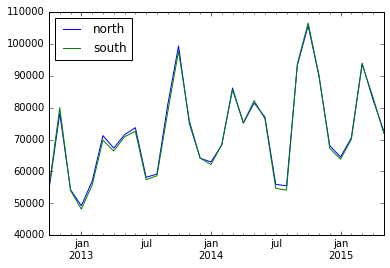

In [34]:
df_monthly = df.resample('M').sum()
df_monthly.plot()

<div class="alert alert-success">

**QUESTION**: Let's have a look at some short term patterns. Select the data of the first 3 weeks of January 2014, calculate the hourly counts and visualize them.

</div>

In [35]:
df_hourly = df.resample('H').sum()

In [36]:
df_hourly.head()

,north,south
2012-10-12 23:00:00,31.0,57.0
2012-10-13 00:00:00,28.0,46.0
2012-10-13 01:00:00,23.0,34.0
2012-10-13 02:00:00,16.0,36.0
2012-10-13 03:00:00,3.0,16.0


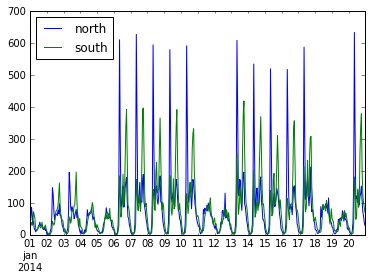

In [37]:
df_hourly['2014-01-01':'2014-01-20'].plot()

---

Looking at the data in the above exercises, there seems to be clearly a:

- daily pattern
- weekly pattern
- yearly pattern

Such patterns can easily be calculated and visualized in pandas using the DatetimeIndex attributes `weekday` combined with `groupby` functionality. Below a taste of the possibilities, and we will learn about this in a later notebook:

Weekly pattern:

In [38]:
df_daily = df.resample('D').sum()

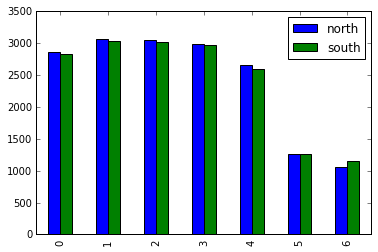

In [39]:
df_daily.groupby(df_daily.index.weekday).mean().plot(kind='bar')

Daily pattern:

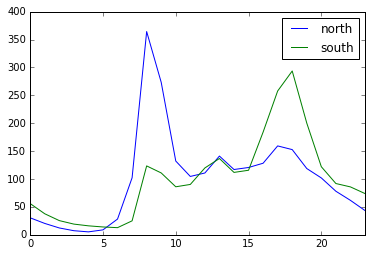

In [40]:
df_hourly.groupby(df_hourly.index.hour).mean().plot()

So the daily pattern is clearly different for both directions. In the morning more people go north, in the evening more people go south. The morning peak is also more condensed.

In [41]:
df_monthly = df.resample('M').sum()

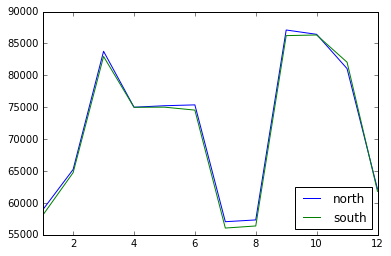

In [42]:
df_monthly.groupby(df_monthly.index.month).mean().plot()